In [4]:
import requests
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import PoissonRegressor

In [10]:
url = 'https://raw.githubusercontent.com/nagyk430/preaching_research/main/preaching_research_data.xlsx'
response = requests.get(url)
df_orig = pd.read_excel(BytesIO(response.content))
df_orig.rename(columns={"rowSums.dfm_politika.": "rowSums_dfm_politika"}, inplace=True)
df_orig

,linkek,helyszín,dátum,felekezet,helyszín_dummy,year,felekezet_3,rowSums_dfm_politika,ID,unnep,...,anger_szám,anticipation_szám,disgust_szám,fear_szám,joy_szám,negative_szám,positive_szám,sadness_szám,surprise_szám,trust_szám
0,https://metadata.nava.hu/subtitle/2022/05/08/d...,Pesterzsébet,2022-05-08,baptista,0,2022,kisebb_egyhazak,9,1,0,...,40,75,39,47,81,95,146,46,42,122
1,https://metadata.nava.hu/subtitle/2023/05/07/d...,Veresegyház,2023-05-07,baptista,0,2023,kisebb_egyhazak,5,2,0,...,6,17,6,13,24,27,57,12,7,39
2,https://metadata.nava.hu/subtitle/2021/04/25/d...,Debrecen,2021-04-25,baptista,0,2021,kisebb_egyhazak,23,3,0,...,27,76,29,39,59,93,143,42,34,96
3,https://metadata.nava.hu/subtitle/2024/04/07/d...,Kaposvár,2024-04-07,baptista,0,2024,kisebb_egyhazak,6,4,0,...,8,20,5,9,14,35,37,10,12,25
4,https://metadata.nava.hu/subtitle/2024/03/29/d...,Csömör,2024-03-29,evangélikus,0,2024,kisebb_egyhazak,26,5,1,...,52,53,38,56,60,126,104,64,25,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,https://metadata.nava.hu/subtitle/2024/09/22/d...,Nyíregyháza,2024-09-22,református,0,2024,református,18,117,0,...,32,53,33,43,51,96,138,44,17,96
117,https://metadata.nava.hu/subtitle/2024/08/20/d...,Budapest,2024-08-20,katolikus,1,2024,katolikus,83,118,1,...,28,98,17,44,124,90,256,37,51,183
118,https://metadata.nava.hu/subtitle/2024/09/29/d...,Budapest,2024-09-29,katolikus,1,2024,katolikus,19,119,0,...,16,44,12,22,55,63,123,16,21,90
119,https://metadata.nava.hu/subtitle/2024/10/20/d...,Jászárokszállás,2024-10-20,katolikus,0,2024,katolikus,43,120,0,...,23,72,17,31,83,69,169,31,41,124


In [11]:
df_orig.select_dtypes(include="object")

,linkek,helyszín,felekezet,felekezet_3,regio,terseg,honap,negyedev
0,https://metadata.nava.hu/subtitle/2022/05/08/d...,Pesterzsébet,baptista,kisebb_egyhazak,Közép-Magyarország,Közép-Magyarország,2022-05,2022 Q2
1,https://metadata.nava.hu/subtitle/2023/05/07/d...,Veresegyház,baptista,kisebb_egyhazak,Közép-Magyarország,Közép-Magyarország,2023-05,2023 Q2
2,https://metadata.nava.hu/subtitle/2021/04/25/d...,Debrecen,baptista,kisebb_egyhazak,Észak-Alföld,Tiszántúl,2021-04,2021 Q2
3,https://metadata.nava.hu/subtitle/2024/04/07/d...,Kaposvár,baptista,kisebb_egyhazak,Dél-Dunántúl,Dunántúl,2024-04,2024 Q2
4,https://metadata.nava.hu/subtitle/2024/03/29/d...,Csömör,evangélikus,kisebb_egyhazak,Közép-Magyarország,Közép-Magyarország,2024-03,2024 Q1
...,...,...,...,...,...,...,...,...
116,https://metadata.nava.hu/subtitle/2024/09/22/d...,Nyíregyháza,református,református,Észak-Alföld,Tiszántúl,2024-09,2024 Q3
117,https://metadata.nava.hu/subtitle/2024/08/20/d...,Budapest,katolikus,katolikus,Közép-Magyarország,Közép-Magyarország,2024-08,2024 Q3
118,https://metadata.nava.hu/subtitle/2024/09/29/d...,Budapest,katolikus,katolikus,Közép-Magyarország,Közép-Magyarország,2024-09,2024 Q3
119,https://metadata.nava.hu/subtitle/2024/10/20/d...,Jászárokszállás,katolikus,katolikus,Dél-Alföld,Tiszántúl,2024-10,2024 Q4


In [12]:
onehot = OneHotEncoder()
cols = ["felekezet_3", "regio"]
transformed = onehot.fit_transform(df_orig[cols])
dummy_data = pd.DataFrame(transformed.toarray(), columns=onehot.get_feature_names_out())
df_orig = pd.concat([df_orig.drop(cols, axis=1), dummy_data], axis=1)

In [13]:
df_kiv = df_orig.select_dtypes(include=["int64", "float64"])
df_kiv

,helyszín_dummy,year,rowSums_dfm_politika,ID,unnep,botrany,document_hossz,politikai_arany,anger_szám,anticipation_szám,...,felekezet_3_kisebb_egyhazak,felekezet_3_református,regio_Dél-Alföld,regio_Dél-Dunántúl,regio_Határontúli_települések,regio_Közép-Dunántúl,regio_Közép-Magyarország,regio_Nyugat-Dunántúl,regio_Észak-Alföld,regio_Észak-Magyarország
0,0,2022,9,1,0,0,334,2.694611,40,75,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,2023,5,2,0,0,116,4.310345,6,17,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,2021,23,3,0,0,348,6.609195,27,76,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,2024,6,4,0,0,109,5.504587,8,20,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2024,26,5,1,1,276,9.420290,52,53,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,2024,18,117,0,1,255,7.058824,32,53,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
117,1,2024,83,118,1,1,387,21.447028,28,98,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
118,1,2024,19,119,0,1,273,6.959707,16,44,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
119,0,2024,43,120,0,1,358,12.011173,23,72,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


First model

In [14]:
X = df_kiv[["felekezet_3_katolikus", "felekezet_3_kisebb_egyhazak", "felekezet_3_református", "regio_Dél-Alföld", "regio_Dél-Dunántúl", "regio_Határontúli_települések", "regio_Közép-Dunántúl",
"regio_Közép-Magyarország", "regio_Nyugat-Dunántúl", "regio_Észak-Alföld", "regio_Észak-Magyarország","unnep", "document_hossz"]].copy()
y = df_kiv[["rowSums_dfm_politika"]].copy()

In [15]:
X["katolikus_unnep_interaction"] = X["felekezet_3_katolikus"] * X["unnep"]
X["reformatus_unnep_interaction"] = X["felekezet_3_református"] * X["unnep"]
X["kisebb_egyhazak_unnep_interaction"] = X["felekezet_3_kisebb_egyhazak"] * X["unnep"]

In [16]:
offset = np.log(X["document_hossz"])
X_new = X.drop(columns=["document_hossz", "felekezet_3_kisebb_egyhazak", "regio_Közép-Magyarország", "kisebb_egyhazak_unnep_interaction"])

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_new.columns)

In [18]:
X_train, X_test, y_train, y_test, offset_train, offset_test = train_test_split(X_scaled_df, y, offset, random_state=42, test_size=0.2)

In [19]:
model1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Poisson(), offset=offset_train)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     rowSums_dfm_politika   No. Observations:                   96
Model:                              GLM   Df Residuals:                       83
Model Family:                   Poisson   Df Model:                           12
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -355.69
Date:                  P, 21 febr. 2025   Deviance:                       290.45
Time:                          19:52:11   Pearson chi2:                     298.
No. Iterations:                       5   Pseudo R-squ. (CS):             0.4979
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.5623      0.027    -94.256      0.000      -2.616      -2.509
felekezet_3_katolikus             0.0024      0.045      0.054      0.957      -0.085       0.090
felekezet_3_református            0.1104      0.041      2.675      0.007       0.030       0.191
regio_Dél-Alföld                  0.0815      0.023      3.568      0.000       0.037       0.126
regio_Dél-Dunántúl                0.0764      0.025      3.016      0.003       0.027       0.126
regio_Határontúli_települések    -0.0111      0.023     -0.491      0.623      -0.055       0.033
regio_Közép-Dunántúl             -0.0832      0.031     -2.646      0.008      -0.145      -0.022
regio_Nyugat-Dunántúl            -0.0397      0.026     -1.511      0.131      -0.091       0.012
regio_Észak-Alföld               -0.0046      0.025     -0.189      0.850      -0.053       0.044
regio_Észak-Magyarország          0.0432      0.030      1.425      0.154      -0.016       0.103
unnep                            -0.0280      0.093     -0.303      0.762      -0.210       0.154
katolikus_unnep_interaction       0.1435      0.087      1.651      0.099      -0.027       0.314
reformatus_unnep_interaction     -0.1537      0.064     -2.391      0.017      -0.280      -0.028
=================================================================================================
"""

In [20]:
y_pred1 = results1.predict(sm.add_constant(X_test), offset=offset_test)

In [21]:
y_train = y_train.values.ravel()

In [22]:
lr = PoissonRegressor(alpha=1.0, max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_rounded = np.round(y_pred)
y_pred_rounded[y_pred_rounded < 0] = 0

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

print(classification_report(y_test, y_pred_rounded, zero_division=0))
accuracy = accuracy_score(y_test, y_pred_rounded)
print(f"AUC: {accuracy}")

RMSE: 10.61866409282965
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         3
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.10      1.00      0.18         1
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        17.0       0.25      1.00      0.40         1
        19.0       0.00      0.00      0.00         2
        20.0       0.00      0.00      0.00         2
        21.0       0.00      0.00      0.00         2
        23.0       0.00      0.00      0.00         1
   

Second model

In [23]:
X2 = df_kiv[["felekezet_3_katolikus", "felekezet_3_kisebb_egyhazak", "felekezet_3_református", "regio_Dél-Alföld", "regio_Dél-Dunántúl", "regio_Határontúli_települések", "regio_Közép-Dunántúl",
"regio_Közép-Magyarország", "regio_Nyugat-Dunántúl", "regio_Észak-Alföld", "regio_Észak-Magyarország","unnep", "document_hossz", "botrany"]].copy()
y2 = df_kiv[["rowSums_dfm_politika"]].copy()

In [24]:
X2["botrany_unnep_interaction"] = X2["botrany"] * X2["unnep"]

In [25]:
offset2 = np.log(X2["document_hossz"])
X_new2 = X2.drop(columns=["document_hossz", "felekezet_3_kisebb_egyhazak", "regio_Közép-Magyarország"])

In [26]:
X_scaled2 = scaler.fit_transform(X_new2)
X_scaled_df2 = pd.DataFrame(X_scaled2, columns=X_new2.columns)

In [27]:
X_train2, X_test2, y_train2, y_test2, offset_train2, offset_test2 = train_test_split(X_scaled_df2, y2, offset2, random_state=42, test_size=0.2)

In [28]:
model2 = sm.GLM(y_train2, sm.add_constant(X_train2), family=sm.families.Poisson(), offset=offset_train2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     rowSums_dfm_politika   No. Observations:                   96
Model:                              GLM   Df Residuals:                       83
Model Family:                   Poisson   Df Model:                           12
Link Function:                      Log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -364.97
Date:                  P, 21 febr. 2025   Deviance:                       309.00
Time:                          19:52:45   Pearson chi2:                     313.
No. Iterations:                       5   Pseudo R-squ. (CS):             0.3908
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.5251      0.026    -97.485      0.000      -2.576      -2.474
felekezet_3_katolikus             0.0744      0.039      1.925      0.054      -0.001       0.150
felekezet_3_református            0.0626      0.036      1.723      0.085      -0.009       0.134
regio_Dél-Alföld                  0.0432      0.024      1.833      0.067      -0.003       0.089
regio_Dél-Dunántúl                0.0648      0.026      2.522      0.012       0.014       0.115
regio_Határontúli_települések     0.0175      0.022      0.783      0.433      -0.026       0.061
regio_Közép-Dunántúl             -0.0641      0.032     -2.018      0.044      -0.126      -0.002
regio_Nyugat-Dunántúl            -0.0107      0.026     -0.416      0.678      -0.061       0.040
regio_Észak-Alföld                0.0259      0.024      1.074      0.283      -0.021       0.073
regio_Észak-Magyarország          0.0078      0.029      0.271      0.787      -0.049       0.064
unnep                            -0.0104      0.030     -0.349      0.727      -0.069       0.048
botrany                           0.0114      0.033      0.346      0.729      -0.053       0.076
botrany_unnep_interaction         0.1010      0.033      3.040      0.002       0.036       0.166
=================================================================================================
"""

In [29]:
y_pred2 = results2.predict(sm.add_constant(X_test2), offset=offset_test2)

In [30]:
y_train2 = y_train2.values.ravel()

In [31]:
lr2 = PoissonRegressor(alpha=1.0, max_iter=1000)
lr2.fit(X_train2, y_train2)
y_pred2 = lr2.predict(X_test2)
y_pred_rounded2 = np.round(y_pred2)
y_pred_rounded2[y_pred_rounded2 < 0] = 0

rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
print(f"RMSE: {rmse2}")

print(classification_report(y_test2, y_pred_rounded2, zero_division=0))
accuracy2 = accuracy_score(y_test2, y_pred_rounded2)
print(f"AUC: {accuracy2}")

RMSE: 10.282080523940927
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         3
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         2
        20.0       0.00      0.00      0.00         2
  

In [32]:
threshold1 = np.quantile(y_pred1, 0.75)
threshold2 = np.quantile(y_pred2, 0.75)
actual1 = np.where(y_test['rowSums_dfm_politika'] > threshold1, 1, 0)
actual2 = np.where(y_test2['rowSums_dfm_politika'] > threshold2, 1, 0)

In [33]:
fpr1, tpr1, _ = roc_curve(actual1, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(actual2, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

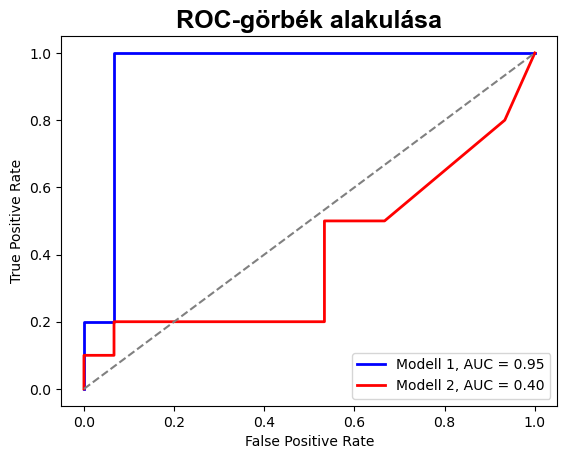

In [34]:
font_dict = {'family': 'Arial', 'size': 18, 'weight': 'bold'}

plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Modell 1, AUC = {roc_auc1:.2f}')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'Modell 2, AUC = {roc_auc2:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-görbék alakulása', fontdict=font_dict)
plt.legend(loc="lower right")
plt.show() # Choose the fisrt model

**Time series analysis**

Use ARIMAX model

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [36]:
url = 'https://raw.githubusercontent.com/nagyk430/preaching_research/main/preaching_research_data.xlsx'
response = requests.get(url)
df = pd.read_excel(BytesIO(response.content))
df.rename(columns={"rowSums.dfm_politika.": "rowSums_dfm_politika"}, inplace=True)
df = df.dropna(subset=['negyedev'])

In [37]:
közpol_negyed = df.groupby('negyedev')['rowSums_dfm_politika'].sum()
mozg_atl3 = közpol_negyed.rolling(window=3, center=True).mean()

In [38]:
kozpol_df= pd.DataFrame(közpol_negyed)

In [39]:
kozpol_df.index = pd.PeriodIndex(kozpol_df.index.str.replace(' ', ''), freq='Q')

In [40]:
kozpol_df = kozpol_df.asfreq("Q")
kozpol_df.index = kozpol_df.index.to_timestamp()

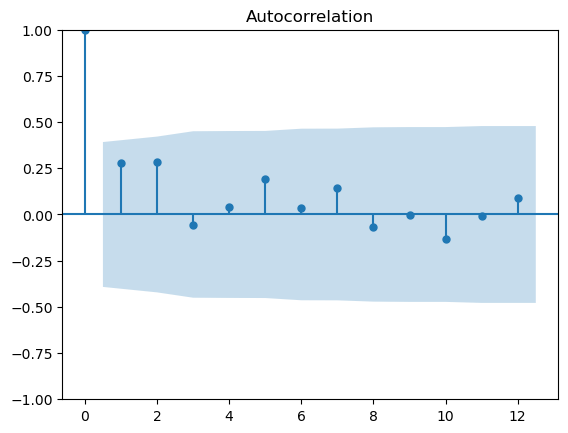

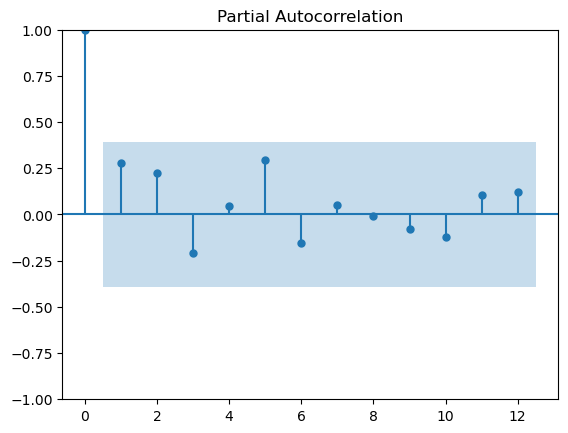

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(kozpol_df);
plot_pacf(kozpol_df);

In [42]:
model = auto_arima(kozpol_df, information_criterion="aic")
model

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

First ARIMAX model

In [43]:
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [44]:
y_train = train_data['rowSums_dfm_politika']
y_test = test_data['rowSums_dfm_politika']

In [45]:
X_train_exog = train_data[['botrany', 'unnep']]
X_test_exog = test_data[['botrany', 'unnep']]

In [46]:
model = SARIMAX(y_train, exog=X_train_exog, order=(0, 1, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     rowSums_dfm_politika   No. Observations:                   96
Model:                 SARIMAX(0, 1, 1)   Log Likelihood                -342.324
Date:                  P, 21 febr. 2025   AIC                            692.649
Time:                          19:55:20   BIC                            702.864
Sample:                               0   HQIC                           696.777
                                   - 96                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
botrany        0.0980      2.826      0.035      0.972      -5.441       5.637
unnep          3.6663      1.926      1.904      0.057      -0.108       7.441
ma.L1         -0.9995      1.383     -0.723      0.470      -3.710       1.711
sigma2        75.3006    106.402      0.708      0.479    -133.244     283.845
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):                 7.26
Prob(Q):                              0.22   Prob(JB):                         0.03
Heteroskedasticity (H):               2.39   Skew:                             0.68
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Second ARIMAX model

In [47]:
train_data['botrany_unnep_interaction'] = train_data['botrany'] * train_data['unnep']
test_data['botrany_unnep_interaction'] = test_data['botrany'] * test_data['unnep']

In [48]:
X_train_exog2 = train_data[['botrany', 'unnep', 'botrany_unnep_interaction']]
X_test_exog2 = test_data[['botrany', 'unnep', 'botrany_unnep_interaction']]

In [49]:
model2 = SARIMAX(y_train, exog=X_train_exog2, order=(0, 1, 1)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     rowSums_dfm_politika   No. Observations:                   96
Model:                 SARIMAX(0, 1, 1)   Log Likelihood                -342.234
Date:                  P, 21 febr. 2025   AIC                            694.468
Time:                          19:55:32   BIC                            707.237
Sample:                               0   HQIC                           699.628
                                   - 96                                         
Covariance Type:                    opg                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
botrany                       1.0696      3.499      0.306      0.760      -5.789       7.928
unnep                         4.0221      2.027      1.984      0.047       0.049       7.995
botrany_unnep_interaction    -2.2359      6.018     -0.372      0.710     -14.031       9.559
ma.L1                        -0.9998      3.580     -0.279      0.780      -8.016       6.016
sigma2                       75.1290    271.247      0.277      0.782    -456.504     606.763
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                 7.08
Prob(Q):                              0.26   Prob(JB):                         0.03
Heteroskedasticity (H):               2.42   Skew:                             0.67
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Third ARIMAX model

In [50]:
X_train_exog3 = train_data[['unnep']]
X_test_exog3 = test_data[['unnep']]

In [51]:
model3 = SARIMAX(y_train, exog=X_train_exog3, order=(2, 1, 0)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     rowSums_dfm_politika   No. Observations:                   96
Model:                 SARIMAX(2, 1, 0)   Log Likelihood                -353.197
Date:                  P, 21 febr. 2025   AIC                            714.393
Time:                          19:55:47   BIC                            724.609
Sample:                               0   HQIC                           718.521
                                   - 96                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
unnep          4.1562      1.983      2.096      0.036       0.269       8.043
ar.L1         -0.5496      0.107     -5.131      0.000      -0.760      -0.340
ar.L2         -0.2373      0.100     -2.378      0.017      -0.433      -0.042
sigma2        98.9195     13.283      7.447      0.000      72.885     124.954
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 3.25
Prob(Q):                              0.44   Prob(JB):                         0.20
Heteroskedasticity (H):               2.28   Skew:                             0.40
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

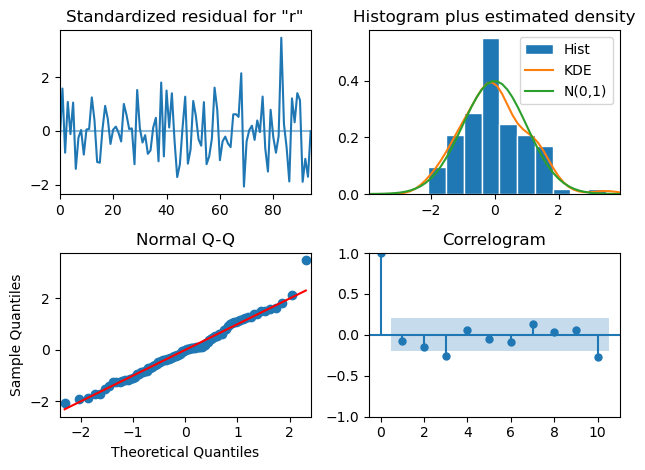

In [52]:
model3.plot_diagnostics()
plt.tight_layout()

In [53]:
y_pred = model3.forecast(steps=len(y_test), exog=X_test_exog3)

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 22.85401976215407


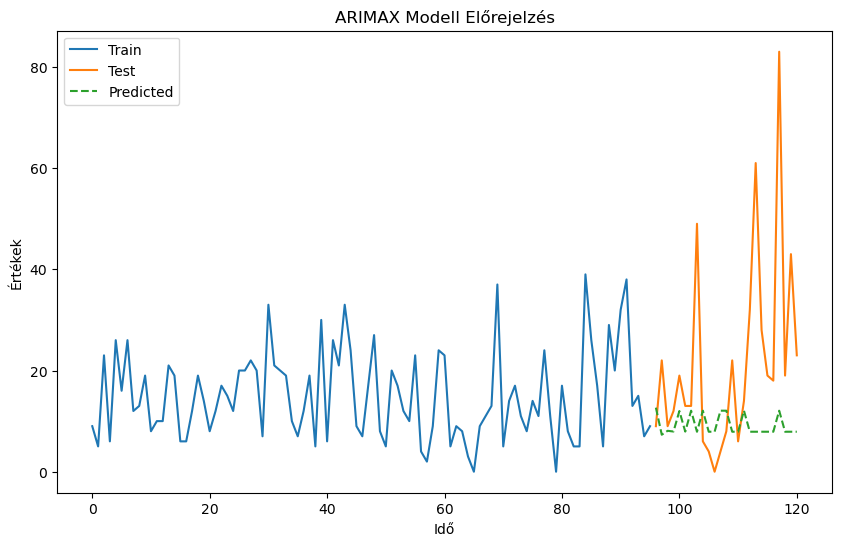

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('ARIMAX Modell Előrejelzés')
plt.xlabel('Idő')
plt.ylabel('Értékek')
plt.show()

Seasonal model

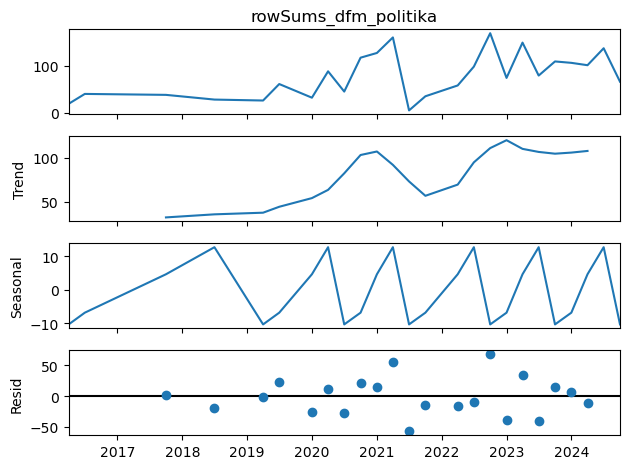

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(kozpol_df["rowSums_dfm_politika"], period=4)
decomp.plot();

In [57]:
params = range(1, 3)
s_params = range(2, 3)

results = []
for P in params:
    for Q in params:
        for s in s_params:
                try:
                    model = SARIMAX(
                        train_data["rowSums_dfm_politika"],
                        order=(0, 1, 1),           
                        seasonal_order=(P, 1, Q, s),
                    )
                    fitted_model = model.fit()
                    test_pred = fitted_model.forecast(25)
                    test_mape = mean_absolute_percentage_error(test_data["rowSums_dfm_politika"], test_pred)
                    
                    results.append({
                        "params": [P, Q, s],
                        "AIC": fitted_model.aic,
                        "Test_MAPE": test_mape
                    })
                except Exception as e:
                    print(f"Error with seasonal parameters {(P, Q, s)}: {str(e)}")

results_df = pd.DataFrame(results)

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
results_df.sort_values(["AIC", "Test_MAPE"])

,params,AIC,Test_MAPE
0,"[1, 1, 2]",696.141818,3.051775e+15
1,"[1, 2, 2]",696.987466,3.025866e+15
2,"[2, 1, 2]",697.547102,2.731908e+15
3,"[2, 2, 2]",698.159907,2.889685e+15


In [59]:
X_train_exog3 = train_data[['unnep']]
X_test_exog3 = test_data[['unnep']]

In [60]:
model_new = SARIMAX(
    train_data["rowSums_dfm_politika"],
    order=(0, 1, 1),
    seasonal_order=(1, 1, 1, 2),
    exog=X_train_exog3
    ).fit()

model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:              rowSums_dfm_politika   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 2)   Log Likelihood                -342.177
Date:                           P, 21 febr. 2025   AIC                            694.353
Time:                                   19:56:40   BIC                            707.016
Sample:                                        0   HQIC                           699.466
                                            - 96                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
unnep          3.7783      1.923      1.965      0.049       0.009       7.547
ma.L1         -0.9141      0.061    -15.101      0.000      -1.033      -0.795
ar.S.L2        0.0090      0.148      0.061      0.951      -0.280       0.298
ma.S.L2       -0.9997     13.986     -0.071      0.943     -28.412      26.413
sigma2        80.0662   1118.921      0.072      0.943   -2112.978    2273.110
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):                 7.54
Prob(Q):                              0.33   Prob(JB):                         0.02
Heteroskedasticity (H):               2.48   Skew:                             0.66
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

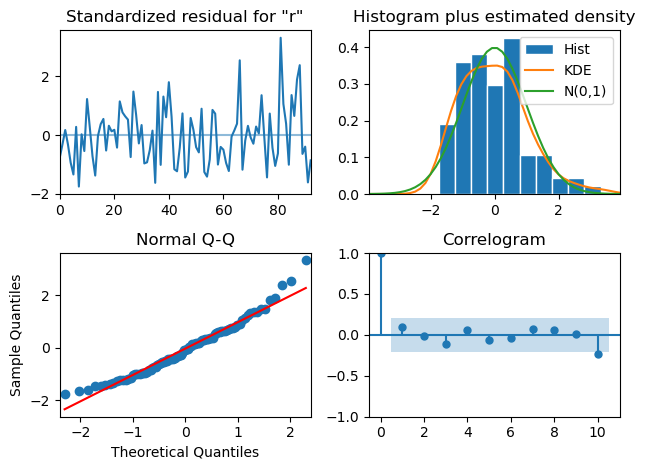

In [61]:
model_new.plot_diagnostics()
plt.tight_layout()

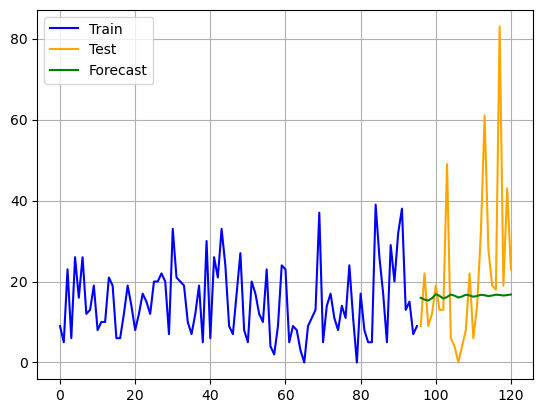

In [62]:
forecast = fitted_model.forecast(25)

plt.plot(train_data["rowSums_dfm_politika"], label="Train", color="blue")
plt.plot(test_data["rowSums_dfm_politika"], label="Test", color="orange")
plt.plot(forecast, label="Forecast", color="green")

plt.legend()
plt.grid()
plt.show() # The best model for us is the model3

**Sentiment analysis**

In [63]:
df['positive_total'] = df[['joy_szám', 'trust_szám', 'anticipation_szám', 'surprise_szám', 'positive_szám']].sum(axis=1)
df['negative_total'] = df[['fear_szám', 'anger_szám', 'disgust_szám', 'sadness_szám', 'negative_szám']].sum(axis=1)

In [64]:
df['sentiment_pontszám'] = df['positive_total'] - df['negative_total']
df

,linkek,helyszín,dátum,felekezet,helyszín_dummy,year,felekezet_3,rowSums_dfm_politika,ID,unnep,...,fear_szám,joy_szám,negative_szám,positive_szám,sadness_szám,surprise_szám,trust_szám,positive_total,negative_total,sentiment_pontszám
0,https://metadata.nava.hu/subtitle/2022/05/08/d...,Pesterzsébet,2022-05-08,baptista,0,2022,kisebb_egyhazak,9,1,0,...,47,81,95,146,46,42,122,466,267,199
1,https://metadata.nava.hu/subtitle/2023/05/07/d...,Veresegyház,2023-05-07,baptista,0,2023,kisebb_egyhazak,5,2,0,...,13,24,27,57,12,7,39,144,64,80
2,https://metadata.nava.hu/subtitle/2021/04/25/d...,Debrecen,2021-04-25,baptista,0,2021,kisebb_egyhazak,23,3,0,...,39,59,93,143,42,34,96,408,230,178
3,https://metadata.nava.hu/subtitle/2024/04/07/d...,Kaposvár,2024-04-07,baptista,0,2024,kisebb_egyhazak,6,4,0,...,9,14,35,37,10,12,25,108,67,41
4,https://metadata.nava.hu/subtitle/2024/03/29/d...,Csömör,2024-03-29,evangélikus,0,2024,kisebb_egyhazak,26,5,1,...,56,60,126,104,64,25,82,324,336,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,https://metadata.nava.hu/subtitle/2024/09/22/d...,Nyíregyháza,2024-09-22,református,0,2024,református,18,117,0,...,43,51,96,138,44,17,96,355,248,107
117,https://metadata.nava.hu/subtitle/2024/08/20/d...,Budapest,2024-08-20,katolikus,1,2024,katolikus,83,118,1,...,44,124,90,256,37,51,183,712,216,496
118,https://metadata.nava.hu/subtitle/2024/09/29/d...,Budapest,2024-09-29,katolikus,1,2024,katolikus,19,119,0,...,22,55,63,123,16,21,90,333,129,204
119,https://metadata.nava.hu/subtitle/2024/10/20/d...,Jászárokszállás,2024-10-20,katolikus,0,2024,katolikus,43,120,0,...,31,83,69,169,31,41,124,489,171,318


<Axes: xlabel='negyedev'>

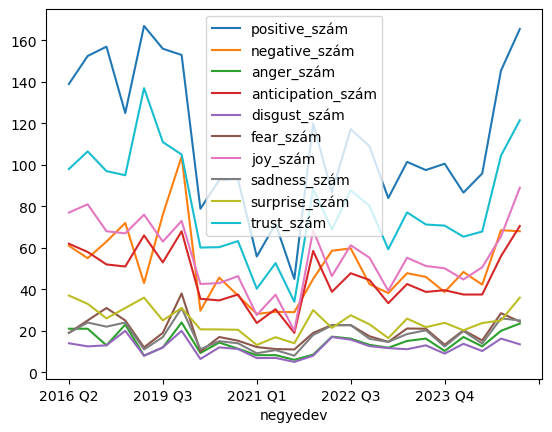

In [65]:
sent_közös = df.groupby('negyedev')[['positive_szám', 'negative_szám', 'anger_szám', 'anticipation_szám', 'disgust_szám', 'fear_szám', 
                                     'joy_szám', 'sadness_szám', 'surprise_szám', 'trust_szám']].mean()
sent_közös.plot()

<Axes: xlabel='negyedev'>

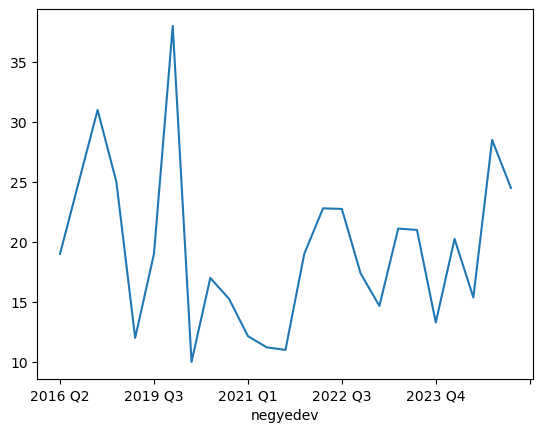

In [66]:
sent_negyed = df.groupby('negyedev')['fear_szám'].mean()
sent_negyed.plot()

In [67]:
sent_df= pd.DataFrame(sent_negyed)
sent_df.index = pd.PeriodIndex(sent_df.index.str.replace(' ', ''), freq='Q')
sent_df = sent_df.asfreq("Q")
sent_df.index = sent_df.index.to_timestamp()

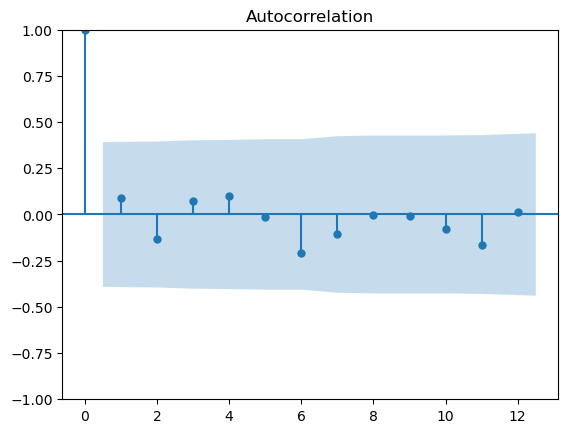

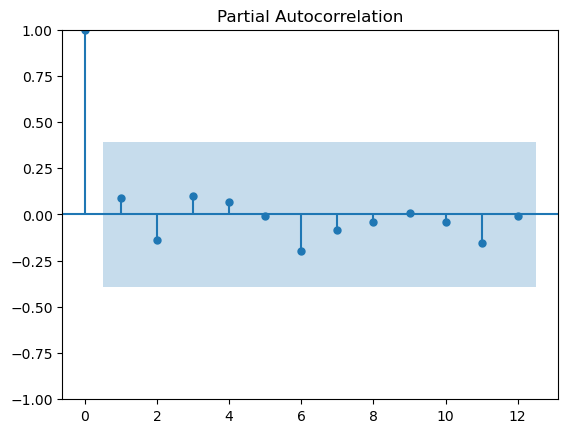

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sent_df);
plot_pacf(sent_df);

In [69]:
model = auto_arima(sent_df, information_criterion="aic")
model

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [70]:
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [71]:
y_train = train_data['fear_szám']
y_test = test_data['fear_szám']

In [72]:
train_data['botrany_unnep_interaction'] = train_data['botrany'] * train_data['unnep']
test_data['botrany_unnep_interaction'] = test_data['botrany'] * test_data['unnep']

In [73]:
X_train_exog = train_data[['rowSums_dfm_politika']]
X_test_exog = test_data[['rowSums_dfm_politika']]

In [74]:
model = SARIMAX(y_train, exog=X_train_exog, order=(2, 0, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              fear_szám   No. Observations:                   96
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -330.309
Date:                P, 21 febr. 2025   AIC                            668.617
Time:                        19:57:47   BIC                            678.875
Sample:                             0   HQIC                           672.763
                                 - 96                                         
Covariance Type:                  opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
rowSums_dfm_politika     0.4819      0.106      4.541      0.000       0.274       0.690
ar.L1                    0.2427      0.066      3.704      0.000       0.114       0.371
ar.L2                    0.6460      0.077      8.441      0.000       0.496       0.796
sigma2                  56.0190      7.496      7.473      0.000      41.327      70.711
===================================================================================
Ljung-Box (L1) (Q):                   1.98   Jarque-Bera (JB):                19.85
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.66
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

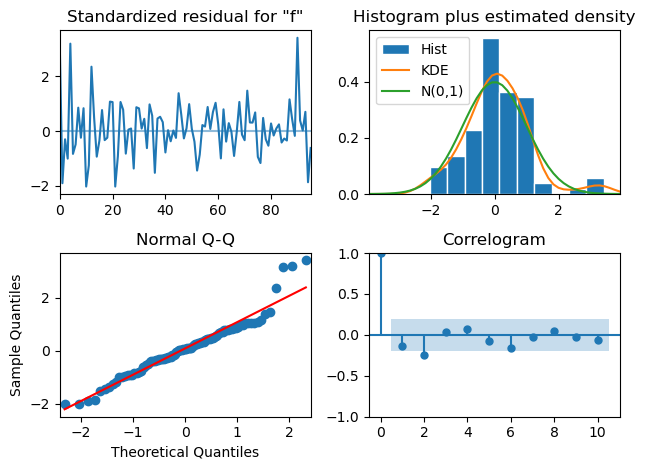

In [75]:
model.plot_diagnostics()
plt.tight_layout()

In [76]:
y_pred = model.forecast(steps=len(y_test), exog=X_test_exog)

In [77]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 15.01072938344316


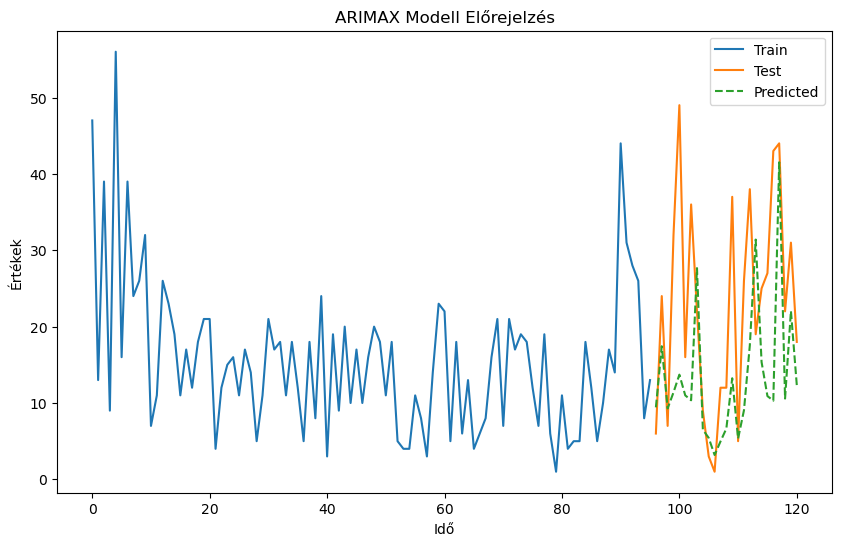

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('ARIMAX Modell Előrejelzés')
plt.xlabel('Idő')
plt.ylabel('Értékek')
plt.show()